In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"


In [40]:
def get_pred_sub(name):
    name_comp = name.split('_')[1:]

    options =[ 'nmes', 'intrinsic', 'fiber', 'starch']

    options_dict = {
        'nmes': 'NMES',
        'intrinsic_sugar': 'Intrinsic Sugars',
        'fiber': 'Fiber',
        'starch': 'Starch'
    }

    pred = ""
    sub = ""
    for comp in name_comp:
        if comp in options:
            if pred == "":
                pred = comp
            else:
                sub = comp

    if pred == 'intrinsic':
        pred = 'intrinsic_sugar'
            

    if sub == 'intrinsic':
        sub = 'intrinsic_sugar'     

    if name_comp[-1] == 'percent':
        outcome = " ".join(name_comp[-2:])
    else:
        outcome = name_comp[-1]


    return options_dict[pred], options_dict[sub], outcome

In [41]:
blood_models = [
 'trig_substitution.csv',
 'ldl_substitution.csv',
 'hdl_substitution.csv',]

anthro_models = [
 'bodyfat_substitution.csv',
 'bmi_substitution.csv',
 'waistcirumference_substitution.csv']

hba1c_model = 'hba1c_percent_substitution.csv'

label_dict = {
    'trig': 'Triglycerides [mmol/L]',
    'ldl': 'LDL [mmol/L]',
    'hdl': 'HDL [mmol/L]',
    'bmi': 'BMI',
    'bf': 'Body Fat [%]',
    'bodyfat': 'Body Fat [%]',
    'waistcirumference': 'Waist Circumference [cm]',
    'hba1c percent': 'HbA1c [%]',
    'hba1c' : 'HbA1c [%]'
}

In [42]:

# Set the font size globally
plt.rcParams['font.size'] = 16


['m_nmes_starch', 'm_starch_fiber', 'm_intrinsic_sugar_starch', 'm_intrinsic_sugar_fiber', 'm_nmes_fiber', 'm_nmes_intrinsic_sugar']
['m_nmes_starch', 'm_starch_fiber', 'm_intrinsic_sugar_starch', 'm_intrinsic_sugar_fiber', 'm_nmes_fiber', 'm_nmes_intrinsic_sugar']
['m_nmes_starch', 'm_starch_fiber', 'm_intrinsic_sugar_starch', 'm_intrinsic_sugar_fiber', 'm_nmes_fiber', 'm_nmes_intrinsic_sugar']


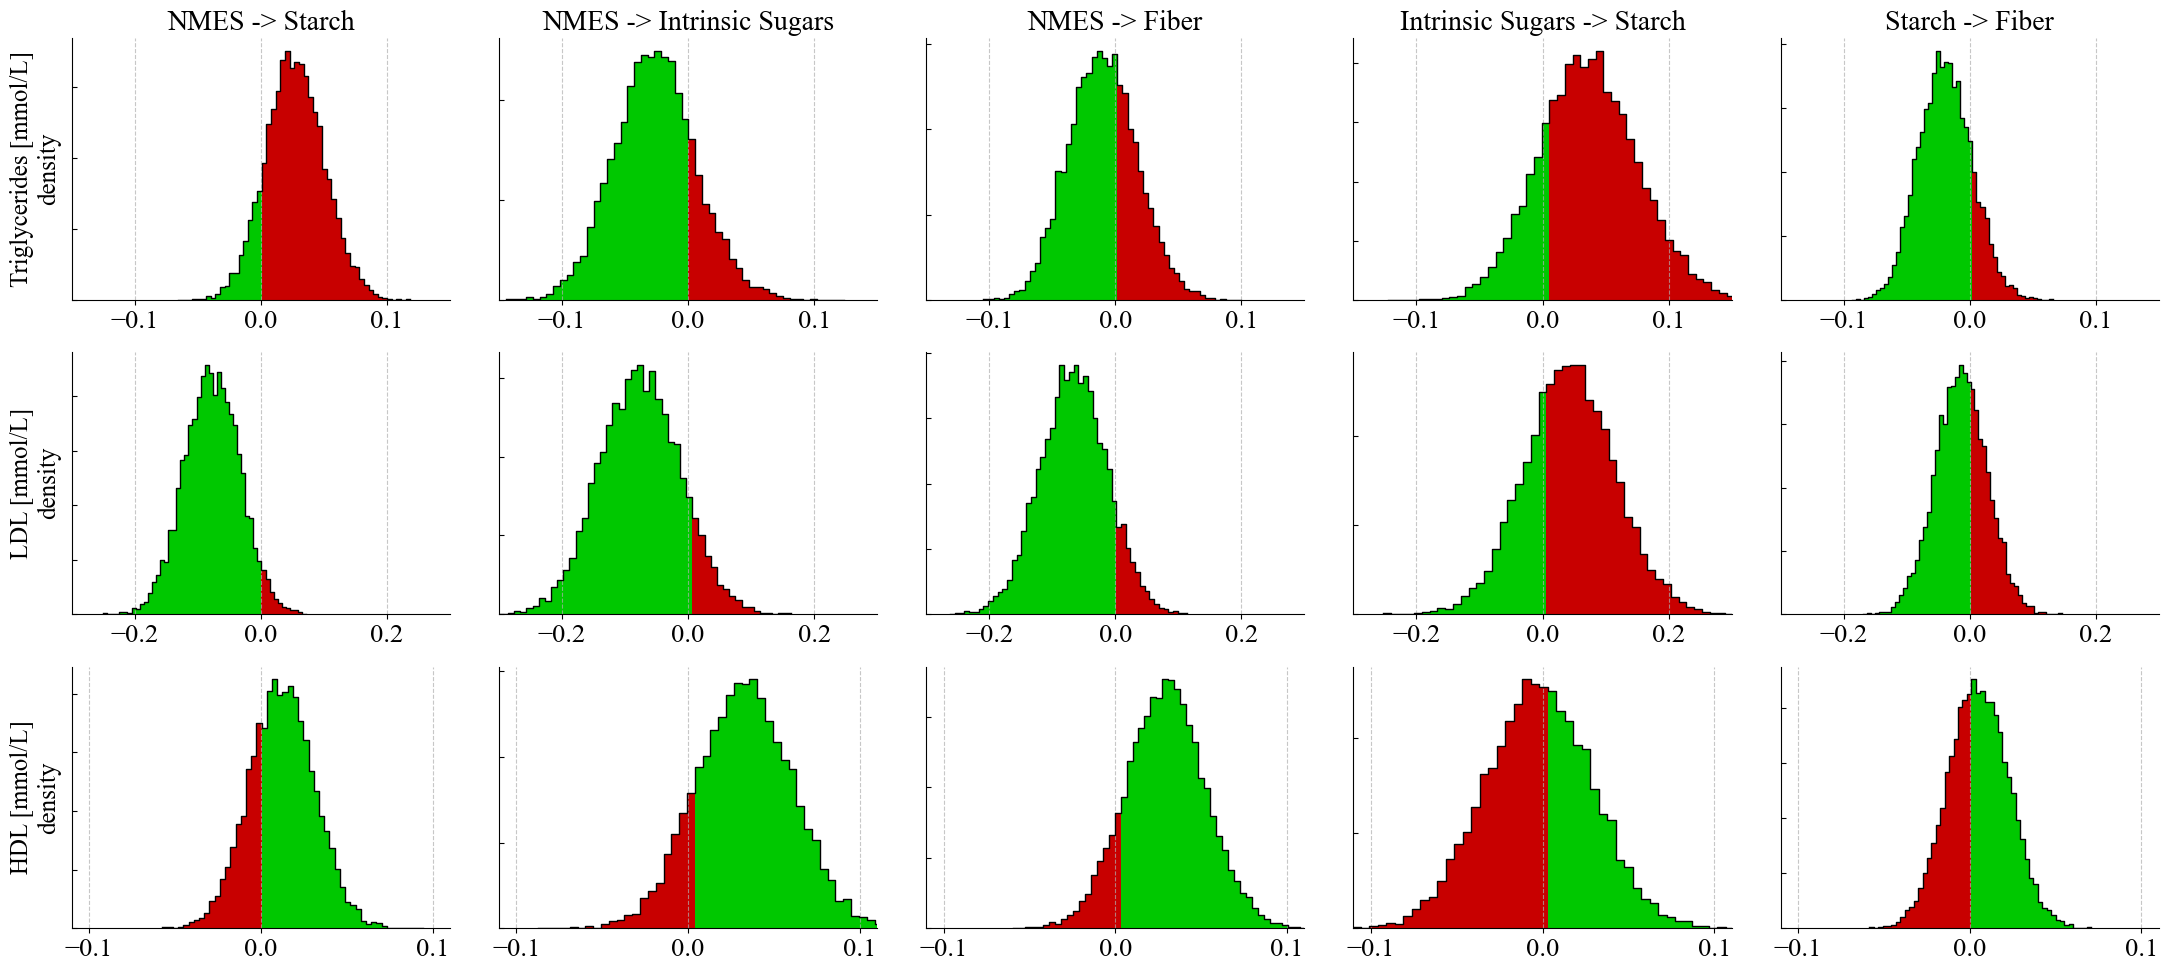

In [43]:
# Create the grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 10),sharex=False, sharey=False)

csfont = {'fontname':'Times New Roman'}

for row, m in enumerate(blood_models):
    df = pd.read_csv('../results/substitutions/' + m[:-4] + '_results.csv', index_col=None)

    #reorder columns for nice plot
    cols = df.columns.tolist()
    print(cols)
    cols = [cols[0], cols[5], cols[4], cols[2], cols[1]]
    df = df[cols]

    names = df.columns
    # Iterate over the models and plot them in the corresponding subplot
    for i, name in enumerate(names):
        # Read the data for the current model
        #     
        # Determine the position of the subplot in the grid
        col = i 
        pred, sub, outcome = get_pred_sub(name)
        outcome = m.split('_')[0]

        # Plot the data in the corresponding subplot
        counts, edges = np.histogram(df[names[i]], bins=50, density=True)

        # Determine the color of each bar based on the x-value
        color1 = (0/255, 200/255, 0/255)
        color2 = (200/255, 0/255, 0/255)


        if outcome == 'hdl':
            colors = [color2 if x < 0 else color1 for x in edges[:-1]]
        else:
            colors = [color1 if x < 0 else color2 for x in edges[:-1]]

        # Plot the histogram using bar
        axes[row, col].bar(edges[:-1], counts, width=np.diff(edges), color=colors, align='edge')

        axes[0, col].set_title(pred + ' -> ' + sub, fontsize=20, **csfont)

        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
        # Add gridlines
        axes[row, col].grid(True, axis='x', linestyle='--', alpha=0.7)
        axes[row, col].step(edges, np.append(counts, counts[-1]), where='post', color='black', linewidth=1)
        axes[row, col].set_yticklabels([])
        axes[row, col].tick_params(axis='y', direction='in')
        axes[row, col].tick_params(axis='x', labelsize='large')

    axes[row, 0].set_ylabel(label_dict[outcome]+'\ndensity', fontsize=18)
        
for col in range(5):
    x_width = .15
    axes[0,col].set_xlim(-x_width, x_width)
for col in range(5):
    x_width = .3
    axes[1,col].set_xlim(-x_width, x_width)
for col in range(5):
    x_width = .11
    axes[2,col].set_xlim(-x_width, x_width)


# Adjust the spacing between subplots
plt.tight_layout()

plt.subplots_adjust(wspace=0.13, hspace=0.2)

plt.savefig('../results/substitution_figures/blood_substitution.pdf', dpi=1200)
# Show the plot
plt.show()

# make plots with 3 anthro variables, 3 bloods, and hba1c separate

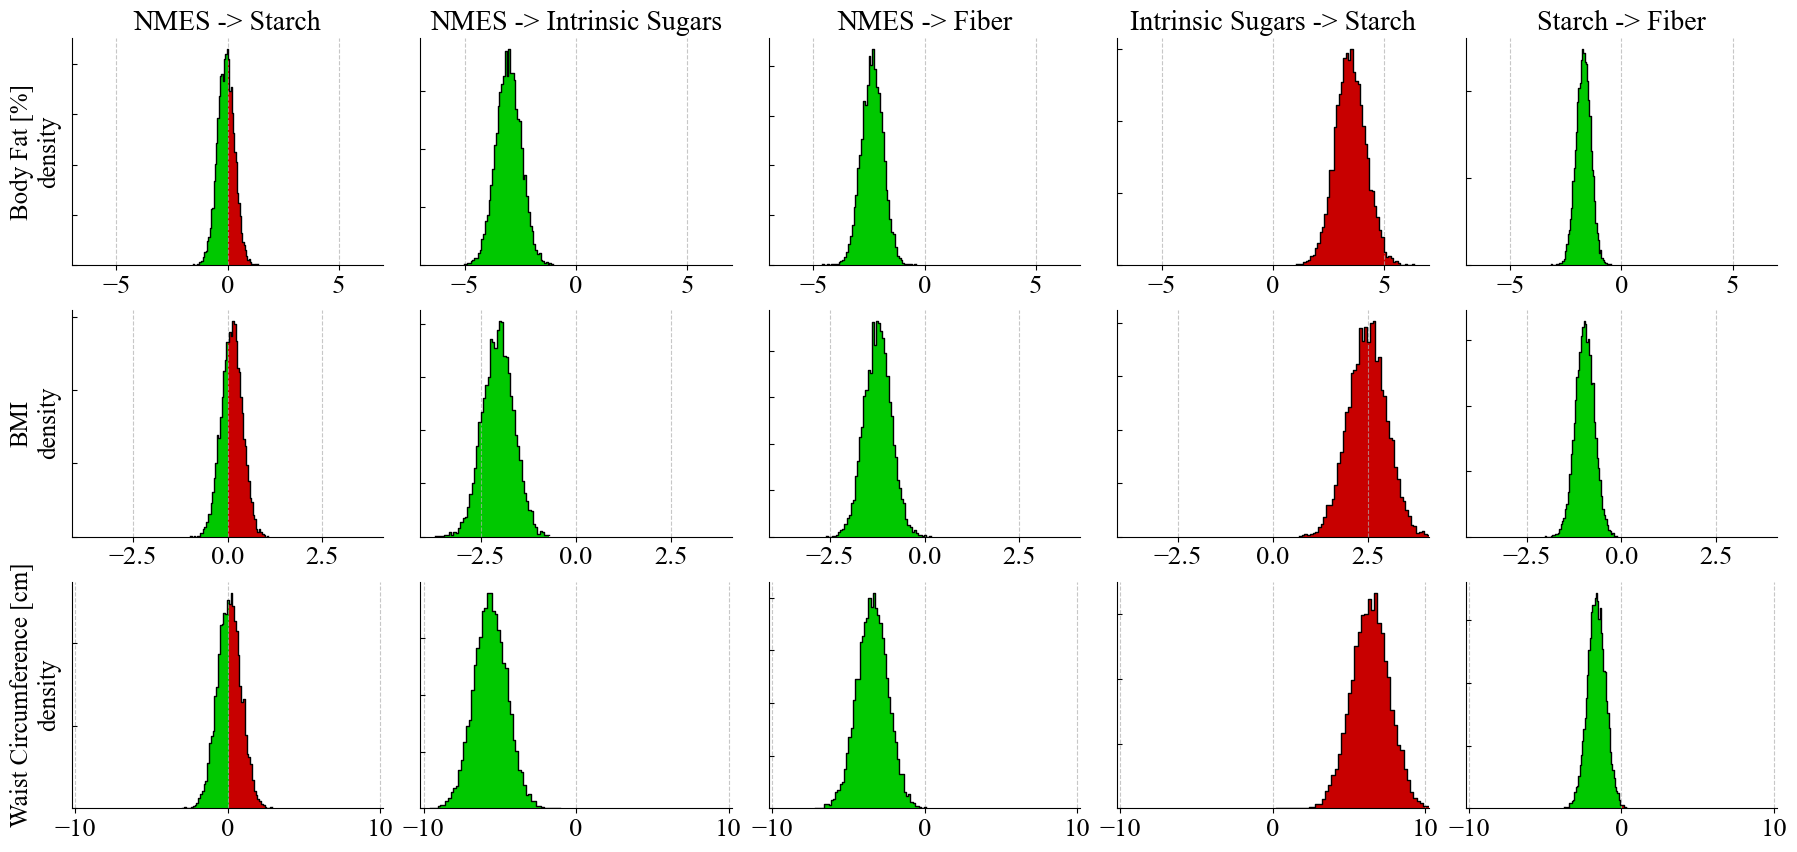

In [44]:
#Anthro results plot

fig, axes = plt.subplots(3, 5, figsize=(22, 10),sharex=False, sharey=False)

for row, m in enumerate(anthro_models):
    df = pd.read_csv('../results/substitutions/' + m[:-4] + '_results.csv')

    #reorder columns for nice plot
    cols = df.columns.tolist()
    cols = [cols[0], cols[5], cols[4], cols[2], cols[1]]
    df = df[cols]

    names = df.columns

    # Iterate over the models and plot them in the corresponding subplot
    for i, name in enumerate(names):
        # Read the data for the current model
        #     
        # Determine the position of the subplot in the grid
        col = i 
        pred, sub, outcome = get_pred_sub(name)
        outcome = m.split('_')[0]

        # Plot the data in the corresponding subplot
        counts, edges = np.histogram(df[names[i]], bins=50, density=True)

        # Determine the color of each bar based on the x-value
        color1 = (0/255, 200/255, 0/255)
        color2 = (200/255, 0/255, 0/255)


        if outcome == 'hdl':
            colors = [color2 if x < 0 else color1 for x in edges[:-1]]
        else:
            colors = [color1 if x < 0 else color2 for x in edges[:-1]]

        # Plot the histogram using bar
        axes[row, col].bar(edges[:-1], counts, width=np.diff(edges), color=colors, align='edge')

        axes[0, col].set_title(pred + ' -> ' + sub, fontsize=20)

        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
        # Add gridlines
        axes[row, col].grid(True, axis='x', linestyle='--', alpha=0.7)
        axes[row, col].step(edges, np.append(counts, counts[-1]), where='post', color='black', linewidth=1)
        axes[row, col].set_yticklabels([])
        axes[row, col].tick_params(axis='y', direction='in')
        axes[row, col].tick_params(axis='x', labelsize='large')

    axes[row, 0].set_ylabel(label_dict[outcome]+'\ndensity', fontsize=18)
        
for col in range(5):
    x_width = 7
    axes[0,col].set_xlim(-x_width, x_width)
for col in range(5):
    x_width = 4.1
    axes[1,col].set_xlim(-x_width, x_width)
for col in range(5):
    x_width = 10.2
    axes[2,col].set_xlim(-x_width, x_width)


# Adjust the spacing between subplots
#plt.tight_layout()

plt.subplots_adjust(wspace=0.12, hspace=0.2)

plt.savefig('../results/substitution_figures/anthro_substitution.pdf', bbox_inches='tight',dpi=1200)
# Show the plot
plt.show()

# make plots with 3 anthro variables, 3 bloods, and hba1c separate


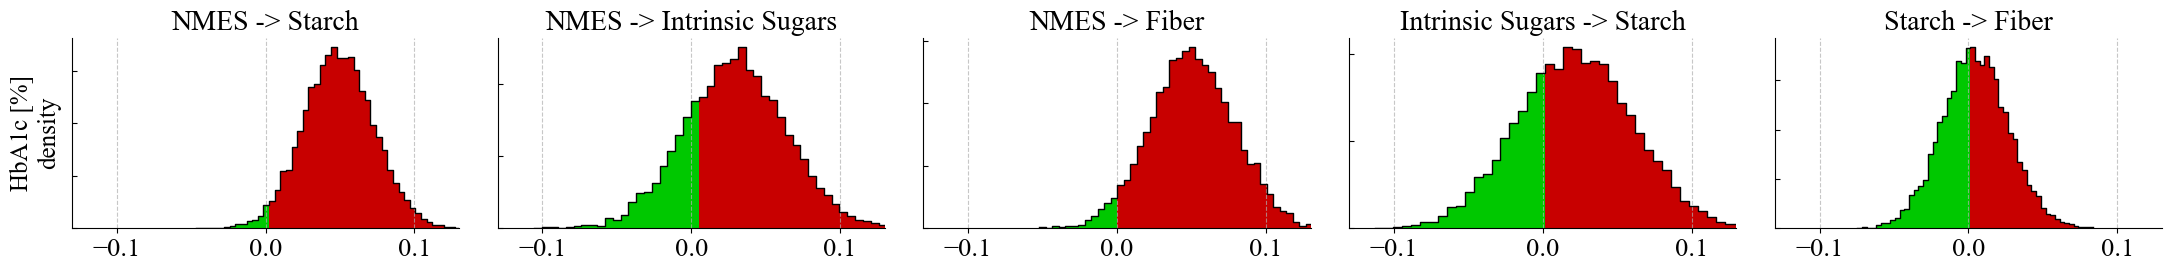

In [45]:
#Hba1c results plot

fig, axes = plt.subplots(1, 5, figsize=(22, 3),sharex=False, sharey=False)
m = hba1c_model
df = pd.read_csv('../results/substitutions/hba1c_substitution_results.csv')

#reorder columns for nice plot
cols = df.columns.tolist()
cols = [cols[0], cols[5], cols[4], cols[2], cols[1]]
df = df[cols]

names = df.columns

# Iterate over the models and plot them in the corresponding subplot
for i, name in enumerate(names):
    # Read the data for the current model
    #     
    # Determine the position of the subplot in the grid
    col = i 
    pred, sub, outcome = get_pred_sub(name)
    outcome = m.split('_')[0]

    # Plot the data in the corresponding subplot
    counts, edges = np.histogram(df[names[i]], bins=50, density=True)

    # Determine the color of each bar based on the x-value
    color1 = (0/255, 200/255, 0/255)
    color2 = (200/255, 0/255, 0/255)


    if outcome == 'hdl':
        colors = [color2 if x < 0 else color1 for x in edges[:-1]]
    else:
        colors = [color1 if x < 0 else color2 for x in edges[:-1]]

    # Plot the histogram using bar
    axes[col].bar(edges[:-1], counts, width=np.diff(edges), color=colors, align='edge')

    axes[col].set_title(pred + ' -> ' + sub, fontsize=20)

    axes[col].spines['top'].set_visible(False)
    axes[col].spines['right'].set_visible(False)
    # Add gridlines
    axes[col].grid(True, axis='x', linestyle='--', alpha=0.7)
    axes[col].step(edges, np.append(counts, counts[-1]), where='post', color='black', linewidth=1)
    axes[col].set_yticklabels([])
    axes[col].tick_params(axis='y', direction='in')
    axes[col].tick_params(axis='x', labelsize='large')

axes[0].set_ylabel(label_dict[outcome]+'\ndensity', fontsize=18)
    
for col in range(5):
    x_width = .13
    axes[col].set_xlim(-x_width, x_width)

# Adjust the spacing between subplots
plt.tight_layout()

plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.savefig('../results/substitution_figures/hba1c_substitution.pdf', dpi=1200)
# Show the plot
plt.show()

# make plots with 3 anthro variables, 3 bloods, and hba1c separate
